In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import IPython
import sklearn

In [2]:
# Import breast cancer data set
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print("Shape of cancer data: {}".format(cancer.data.shape))

# Prints the shape of the data set - 569 data points and 30 features each

Shape of cancer data: (569, 30)


In [41]:
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

# Print the amount of samples per class

print(cancer['data'])
print(cancer['target'])

Sample counts per class:
{'malignant': 212, 'benign': 357}
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0

In [6]:
print("Feature names:\n{}".format(cancer.feature_names))

# Print all the features of each sample

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [44]:
# train_test_split function
    # 75% of the rows will be the training set
    # 25% of the rows become the test set
    # Data is randomly shuffled before it is split
     
    # Ask about 'data' and 'target'
    # Ask about 'stratify' parameter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify = cancer['target'], random_state = 0)

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [10]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

# Print accuracy of training and test set - training set should be perfect

Accuracy on training set: 1.000
Accuracy on test set: 0.881


In [18]:
# Increase accuracy on test set
tree = DecisionTreeClassifier(max_depth=7, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [19]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.923


In [21]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

In [27]:
tree = DecisionTreeClassifier(max_depth=7, max_features = 10, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.951


In [45]:
tree = DecisionTreeClassifier(max_depth=4, max_features = 10, min_samples_split=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.981
Accuracy on test set: 0.930


In [46]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)


In [47]:
! dot -Tpng tree.dot -o tree.png

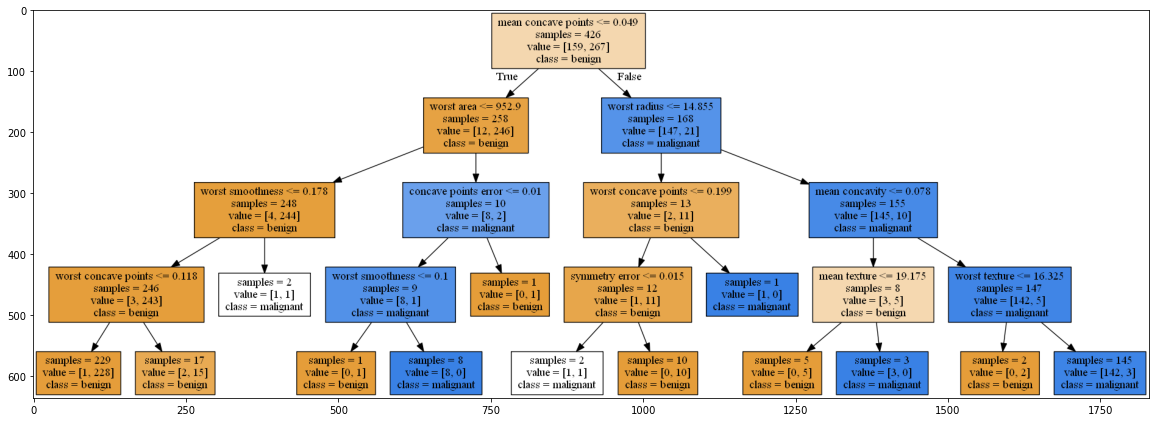

In [49]:
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)